In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from numpy.linalg import lstsq

In [3]:
df = pd.read_csv("./dataset/All_India_Index_july2019_20Aug2020.csv")
df = df[(df.Year != 2020)]
df = df.groupby(['Year'], as_index=False).mean()
df

,Year,Sno,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,2013,18.5,114.516667,113.969444,112.441667,108.302778,104.755556,108.827778,135.338889,106.275000,...,105.608333,108.544444,108.005556,106.766667,106.666667,105.916667,107.688889,104.986111,106.763889,110.013889
1,2014,54.5,122.052778,122.383333,119.272222,119.861111,106.908333,124.766667,139.547222,113.197222,...,114.675000,113.355556,114.900000,112.497222,111.516667,111.877778,115.469444,109.144444,112.536111,117.327778
2,2015,90.5,124.105556,128.997222,119.633333,127.613889,110.563889,129.441667,144.155556,143.269444,...,120.158333,119.022222,121.013889,118.213889,111.158333,117.105556,123.108333,112.413889,116.416667,123.036111
3,2016,126.5,128.222222,137.863889,129.097222,132.513889,115.466667,132.975000,145.155556,172.258333,...,126.475000,122.575000,126.575000,123.900000,113.469444,122.247222,129.897222,119.513889,121.369444,129.100000
4,2017,162.5,133.841667,141.977778,131.600000,138.161111,118.130556,139.772222,144.694444,137.244444,...,133.675000,129.280556,131.694444,128.938889,117.430556,126.836111,136.186111,124.027778,126.200000,133.386111
5,2018,198.5,136.947222,146.611111,137.286111,141.761111,120.677778,146.819444,144.083333,121.080556,...,143.816667,138.297222,138.358333,137.005556,123.336111,133.355556,144.036111,129.850000,132.950000,138.669444
6,2019,233.0,140.109091,158.851515,141.524242,144.284848,122.542424,144.654545,165.324242,128.460606,...,150.763636,138.775758,144.136364,146.924242,125.787879,140.424242,153.742424,136.518182,139.372727,144.127273


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 7 non-null      int64  
 1   Sno                                  7 non-null      float64
 2   Cereals and products                 7 non-null      float64
 3   Meat and fish                        7 non-null      float64
 4   Egg                                  7 non-null      float64
 5   Milk and products                    7 non-null      float64
 6   Oils and fats                        7 non-null      float64
 7   Fruits                               7 non-null      float64
 8   Vegetables                           7 non-null      float64
 9   Pulses and products                  7 non-null      float64
 10  Sugar and Confectionery              7 non-null      float64
 11  Spices                              

In [5]:
df.describe()

,Year,Sno,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2016.000000,126.285714,128.542172,135.807756,127.264971,130.356962,114.149315,132.465332,145.471320,131.683658,...,127.881710,124.264394,126.383369,124.892352,115.623665,122.537590,130.018362,119.493470,122.229834,127.951515
std,2.160247,77.423003,9.047431,15.239939,10.549534,12.869033,6.882110,13.136551,9.453929,22.066638,...,16.037547,11.755253,12.814419,14.001635,6.924991,12.075568,16.100772,11.440754,11.491010,12.015035
min,2013.000000,18.500000,114.516667,113.969444,112.441667,108.302778,104.755556,108.827778,135.338889,106.275000,...,105.608333,108.544444,108.005556,106.766667,106.666667,105.916667,107.688889,104.986111,106.763889,110.013889
25%,2014.500000,72.500000,123.079167,125.690278,119.452778,123.737500,108.736111,127.104167,141.815278,117.138889,...,117.416667,116.188889,117.956944,115.355556,111.337500,114.491667,119.288889,110.779167,114.476389,120.181944
50%,2016.000000,126.500000,128.222222,137.863889,129.097222,132.513889,115.466667,132.975000,144.155556,128.460606,...,126.475000,122.575000,126.575000,123.900000,113.469444,122.247222,129.897222,119.513889,121.369444,129.100000
75%,2017.500000,180.500000,135.394444,144.294444,134.443056,139.961111,119.404167,142.213384,144.925000,140.256944,...,138.745833,133.788889,135.026389,132.972222,120.383333,130.095833,140.111111,126.938889,129.575000,136.027778
max,2019.000000,233.000000,140.109091,158.851515,141.524242,144.284848,122.542424,146.819444,165.324242,172.258333,...,150.763636,138.775758,144.136364,146.924242,125.787879,140.424242,153.742424,136.518182,139.372727,144.127273


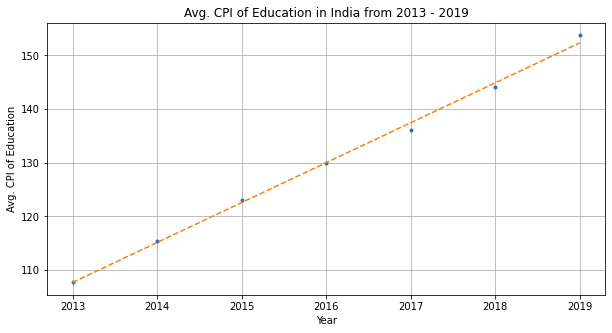

In [50]:
x = df.Year
x = [[i] for i in list(x)]
y = df.Education
y = [[i] for i in list(y)]

model = LinearRegression()
model.fit(x, y)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x, y, '.')
plt.plot(x, model.predict(x), '--')
plt.xlabel('Year')
plt.ylabel('Avg. CPI of Education')
plt.title("Avg. CPI of Education in India from 2013 - 2019")
plt.grid(True)
plt.show()

In [51]:
year = int(input("Enter year: "))
print(f"Predicted avg. CPI of education at { year }: { round(model.predict([[year]])[0][0], 2) }")

Predicted avg. CPI of education at 2020: 159.79


In [52]:
r2_model = LinearRegression()
r2_model.fit(x[:4], y[:4])
print(f"R2 Score: { r2_model.score(x[4:], y[4:]) }")

R2 Score: 0.9698839423331803


In [57]:
year = list(df.Year)
health = list(df.Health)
x = list()

for i in range(len(year)):
    x.append([year[i], health[i]])

mult_reg_model = LinearRegression()
mult_reg_model.fit(x, y)
mult_reg_model.predict([[2020, 150]])

array([[159.48773303]])